## About

The Pfizer–BioNTech COVID‑19 vaccine, sold under the brand name Comirnaty, is a COVID-19 vaccine developed by BioNTech in cooperation with Pfizer. It is both the first COVID-19 vaccine to be authorized by a stringent regulatory authority for emergency use and the first cleared for regular use. In December of 2020, the United Kingdom was the first country to authorize the vaccine on an emergency basis, soon followed by the United States, the European Union and several other countries globally.

## Problem Statement

Study the subjects of recent tweets about the vaccine made in collaboration by Pfizer and BioNTech, perform various NLP tasks on this data source.

## Loading Pfizer Tweets Dataset

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

%matplotlib inline

In [2]:
data = pd.read_csv('vaccination_tweets.csv')
print('Number of Rows in Data {0}'.format(data.shape[0]))
print('Number of Columns in Data {0}'.format(data.shape[1]))
print('Columns in the data set: {0}'.format(list(data.columns)))

Number of Rows in Data 5526
Number of Columns in Data 16
Columns in the data set: ['id', 'user_name', 'user_location', 'user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'date', 'text', 'hashtags', 'source', 'retweets', 'favorites', 'is_retweet']


In [3]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


## Data Preprocessing

In [4]:
stop_words = (set(stopwords.words('english')))

In [5]:
def process_text(data):
    stop = stopwords.words('english')
    data['processed_text'] = data.apply(lambda row: row['text'].replace("\n"," "), axis=1) ## Remove new lines
    data['processed_text'] = data.apply(lambda row: re.sub('http://\S+|https://\S+', 'urls',row['processed_text']).lower(), axis=1) # Remove URL's
    data['processed_text'] = data.apply(lambda row: re.sub('[^A-Za-z ]+', '',row['processed_text']).lower(), axis=1) # Removes special characters, punctuations except alphabets
    data['processed_text'] = data['processed_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) # Removes Stop words
    data['processed_text'] = data.apply(lambda row: re.sub('  +', ' ',row['processed_text']).strip(), axis=1) # Removes extra spaces in between the words
    data['processed_text'] = data.apply(lambda x: x['text'] if len(x['processed_text'])==0 else x['processed_text'], axis=1)
    return data

In [6]:
data = process_text(data)

In [7]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,processed_text
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,folks said daikon paste could treat cytokine s...
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,world wrong side history year hopefully bigges...
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,coronavirus sputnikv astrazeneca pfizerbiontec...
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,facts immutable senator even youre ethically s...
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,explain need vaccine borisjohnson matthancock ...


## Sentiment Analysis using VADER (Valence Aware Dictionary and sentiment Reasoner)

In [8]:
from tqdm.notebook import tqdm

In [9]:
sentiment = SentimentIntensityAnalyzer()
sentiment_list = []
for text in tqdm(list(data['processed_text'].values)):
    if sentiment.polarity_scores(text)["compound"] > 0:
        sentiment_list.append("Positive")
    elif sentiment.polarity_scores(text)["compound"] < 0:
        sentiment_list.append("Negative")
    else:
        sentiment_list.append("Neutral")
data['Sentiment'] = sentiment_list

  0%|          | 0/5526 [00:00<?, ?it/s]

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

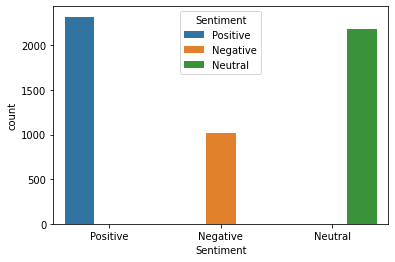

In [10]:
sns.countplot(data = data, x = 'Sentiment', hue = 'Sentiment')

## Word Cloud

In [11]:
def get_word_cloud(sentiment):
    stop_words = (set(stopwords.words('english')))
    remove_words = ['vaccine', 'pfizerbiontech', 'coronavirus', 'pfizer', 'covid', 'covidvaccine', 'pfizervaccine', 'vaccines']
    stop_words = remove_words + list(stop_words)
    plt.figure(figsize=[15,15])
    clean_tweets= "".join(list(data[data['Sentiment']==sentiment]['processed_text'].values))
    wordcloud = WordCloud(width=700,height=400, background_color='white',colormap='plasma', max_words=50, stopwords=stop_words, collocations=False).generate(clean_tweets)
    plt.title(f"Top 50 {sentiment} words used in tweets", fontsize=20)
    plt.imshow(wordcloud)
    return plt.show()

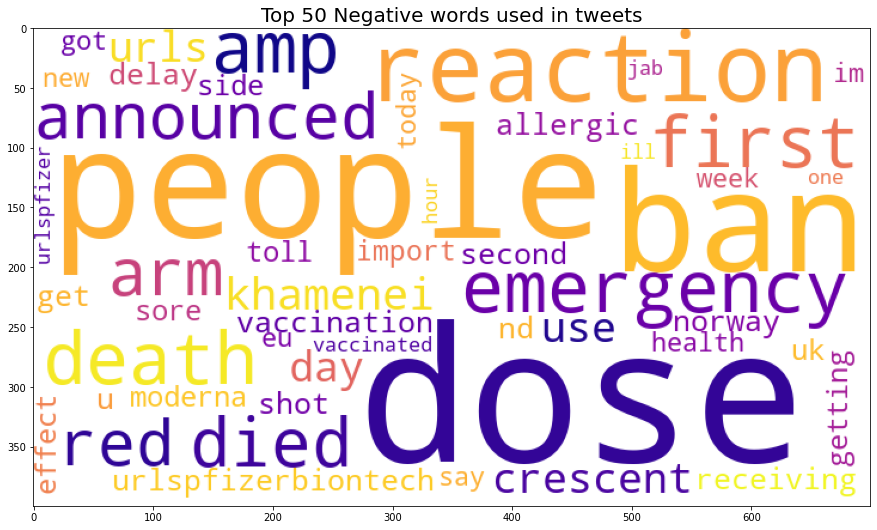

In [12]:
get_word_cloud(sentiment='Negative')

### VADER pretrained classifier in analyzing tweets as negative have given us good results. Few of the words which represent negative sentiments are death, die, sore, risk, dead, serious, delay, ill, allergy etc

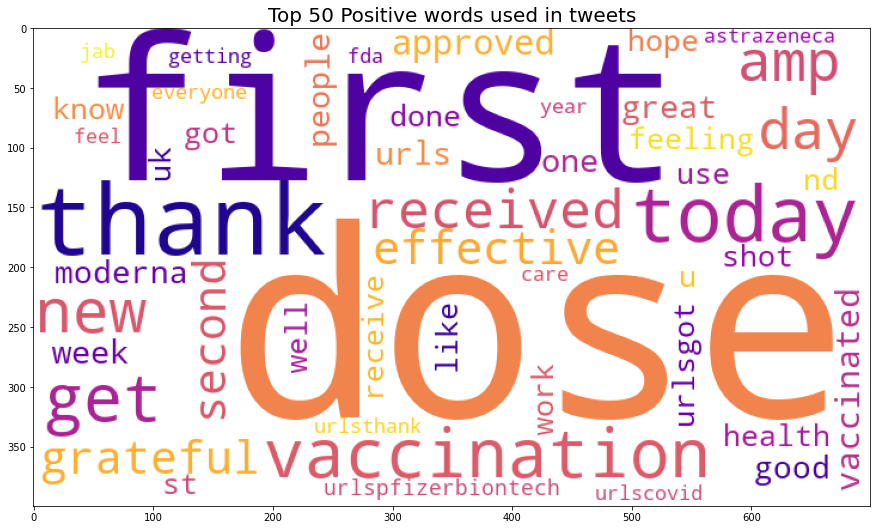

In [13]:
get_word_cloud(sentiment='Positive')

### VADER pretrained classifier in analyzing tweets as positive have given us good results. Few of the words which represent negative sentiments are thank, like, new, good, hope, health, approve, receive, help, need etc

## Tweets per Country 

<AxesSubplot:title={'center':'Tweet count per country'}, xlabel='Country', ylabel='Count'>

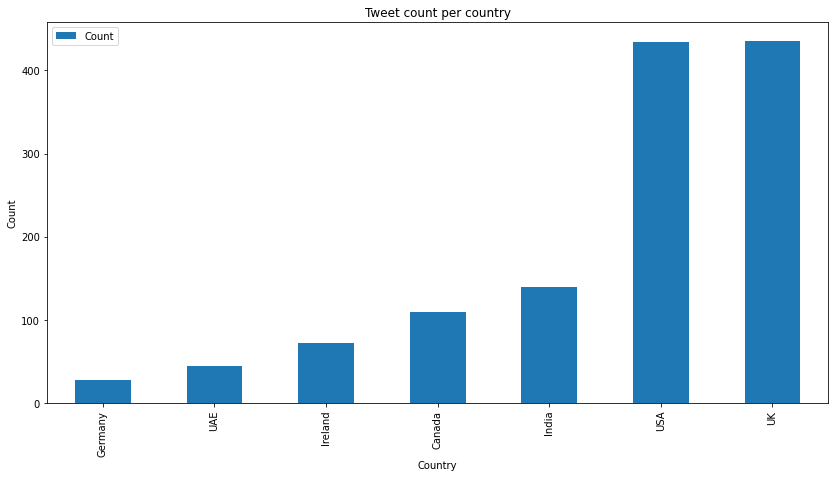

In [14]:
## Reference taken from https://www.kaggle.com/siddheshshankar/sentimental-analysis-of-pfizer-vaccine-tweets/data

loc_df = data['user_location'].str.split(',',expand=True)
loc_df=loc_df.rename(columns={0:'fst_loc',1:'snd_loc'})
loc_df['snd_loc'] = loc_df['snd_loc'].str.strip()

state_fix = {'Ontario': 'Canada','United Arab Emirates': 'UAE','TX': 'USA','NY': 'USA','FL': 'USA','England': 'UK','Watford': 'UK','GA': 'USA','IL': 'USA', 'NY':'USA','United Kingdom':'UK', 
             'Alberta': 'Canada','WA': 'USA','NC': 'USA','British Columbia': 'Canada','MA': 'USA','ON':'Canada','OH':'USA','MO':'USA','AZ':'USA','NJ':'USA','London':'UK',
             'CA':'USA','DC':'USA','AB':'USA','PA':'USA','SC':'USA','VA':'USA','TN':'USA','New York':'USA','Dubai':'UAE','CO':'USA', 'MI':'USA', 'LA':'USA', 'MD':"USA"}
country = loc_df.replace({"snd_loc": state_fix}) 
top_tweets = loc_df['snd_loc'].value_counts()[:20]
tweet_df = pd.DataFrame(top_tweets)
tweet_df.reset_index(level=0, inplace=True)
tweet_df.columns = ['Country', 'Count']
tweet_df['Country'] = tweet_df['Country'].replace(state_fix, regex=False)
tweets_per_country = tweet_df.groupby('Country')['Count'].sum().reset_index().sort_values(by='Count')
tweets_per_country.plot.bar(x='Country', figsize=(14, 7), xlabel='Country', ylabel='Count', title='Tweet count per country')

### From USA, UK and India more number of tweets were there. Since most of the vaccines are being developed from these 3 countries (Pfizer, Oxford and Bharath BioTech respectively).

## Tweets per Day

<AxesSubplot:title={'center':'Tweet count over a period of time'}, xlabel='Date', ylabel='Count'>

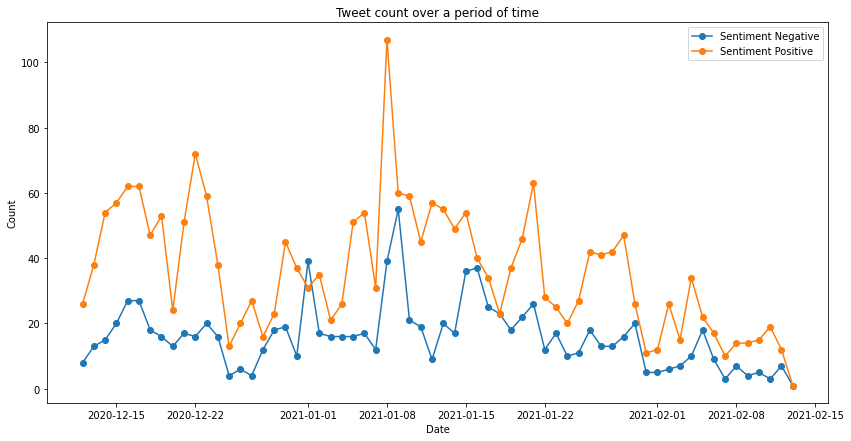

In [15]:
data['date'] = pd.to_datetime(data['date']).dt.date
negative_data = data[data['Sentiment']=='Negative'].reset_index()
positive_data = data[data['Sentiment']=='Positive'].reset_index()
grouped_data_neg = negative_data.groupby('date')['Sentiment'].count().reset_index()
grouped_data_pos = positive_data.groupby('date')['Sentiment'].count().reset_index()
merged_data = pd.merge(grouped_data_neg, grouped_data_pos, left_on='date', right_on='date', suffixes=(' Negative', ' Positive'))

merged_data.plot(x='date', y=['Sentiment Negative', 'Sentiment Positive'], figsize=(14, 7), marker='o', xlabel='Date', ylabel='Count', title='Tweet count over a period of time')

### The number of positive tweets are more than the number of negative tweets for a given day